In [23]:
#数据集打乱
#import pandas as pd
#file_path="/Users/luoyuexin/Desktop/SRTP第二篇论文/统计建模/多元统计/iris_dataset.xlsx"
#df=pd.read_excel(file_path)
#print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [24]:
#打乱数据集，并保存在新文件里
#sample函数从df中随机取样，frac=1表示全取，reset_index(drop=True)重置索引，drop=True防止旧的索引成为新的一列
#shuffled_df=df.sample(frac=1).reset_index(drop=True)
#shuffled_df.to_excel('/Users/luoyuexin/Desktop/SRTP第二篇论文/统计建模/多元统计/打乱的iris数据集.xlsx',index=False)
#print(shuffled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.8               2.7                5.1               1.9   
1                6.9               3.1                4.9               1.5   
2                5.4               3.0                4.5               1.5   
3                6.9               3.1                5.4               2.1   
4                7.7               3.0                6.1               2.3   

   species  
0        2  
1        1  
2        1  
3        2  
4        2  


In [1]:
#-1表示原来数据集的0，1表示原来数据集合的1
import pandas as pd
shuffled_df=pd.read_excel('/Users/luoyuexin/Desktop/SRTP第二篇论文/统计建模/多元统计/iris数据集0-1.xlsx')
print(shuffled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.9               3.1                4.9               1.5   
1                5.4               3.0                4.5               1.5   
2                6.1               2.8                4.7               1.2   
3                5.7               3.0                4.2               1.2   
4                4.8               3.4                1.6               0.2   

   species  
0        1  
1        1  
2        1  
3        1  
4       -1  


In [3]:
#划分训练集和测试集
#from sklearn.model_selection import train_test_split
import numpy as np
shuffled_df=np.array(shuffled_df)
X=shuffled_df[:,:-1]
y=shuffled_df[:,-1]
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2
split_index=int(0.6*len(shuffled_df))
X_train,X_test=X[:split_index],X[split_index:]
y_train,y_test=y[:split_index],y[split_index:]
print('X_train size:',len(X_train))
print('X_test size:',len(X_test))

X_train size: 60
X_test size: 40


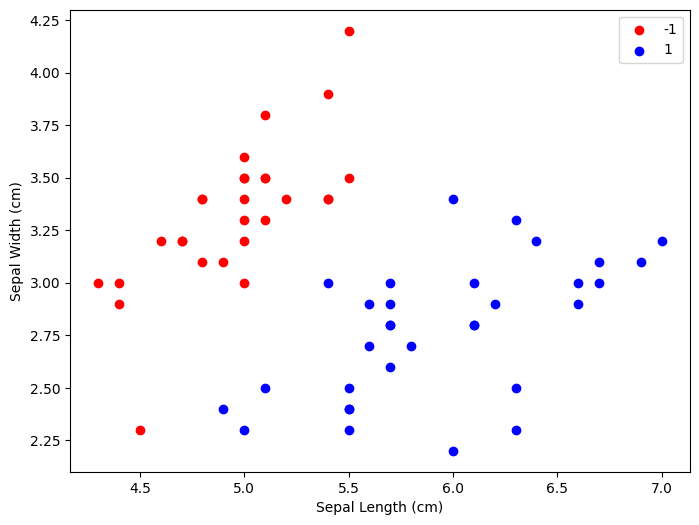

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train==-1][:,0],X_train[y_train==-1][:,1],color='red',label='-1')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],color ='blue',label='1')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

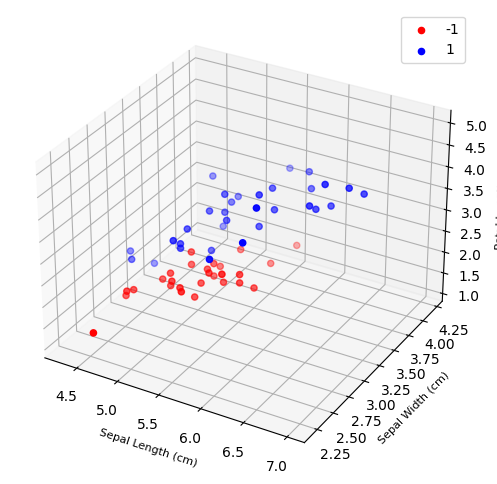

In [6]:
#三维的散点图
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], X_train[y_train == -1][:, 2], color='r', label='-1')
ax.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], color='b', label='1')
ax.set_xlabel('Sepal Length (cm)',fontsize=8)
ax.set_ylabel('Sepal Width (cm)',fontsize=8)
ax.set_zlabel('Petal Length (cm)',fontsize=8)
ax.legend()
plt.show()

In [118]:
import sklearn
from sklearn.svm import SVC

svm_model=SVC(kernel='linear',C=1)
svm_model.fit(X_train,y_train)
predictions=svm_model.predict(X_test)
accuracy=np.mean(predictions==y_test)
print('Accuracy:',accuracy)

Accuracy: 1.0


In [119]:
svm_model=SVC(kernel='rbf',C=1,gamma=1)
svm_model.fit(X_train,y_train)
accuracy=svm_model.score(X_test,y_test)
print('SVM(linear) Accuracy is:', accuracy)

SVM(linear) Accuracy is: 1.0


In [120]:
svm_model=SVC(kernel='rbf',C=1,gamma=1)
svm_model.fit(X_train,y_train)
accuracy=svm_model.score(X_test,y_test)
print('SVM(rbf) Accuracy is:', accuracy)

SVM(rbf) Accuracy is: 1.0


In [121]:
svm_model = SVC(kernel='poly', C=1.0, degree=3)
svm_model.fit(X_train, y_train)
accuracy=svm_model.score(X_test,y_test)
print('SVM(poly) Accuracy is:', accuracy)

SVM(poly) Accuracy is: 1.0


In [14]:
import numpy as np

class LinearSVM:
    def __init__(self, C=1.0, learning_rate=0.2, max_iter=1000):
        self.C = C
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        for _ in range(self.max_iter):
            gradient_w = self.C * self.w
            gradient_b = 0
            for i, x in enumerate(X):
                if y[i] * (np.dot(self.w, x) + self.b) >= 1:
                    gradient_w -= y[i] * x
                gradient_b -= y[i]
            self.w -= self.learning_rate * gradient_w
            self.b -= self.learning_rate * gradient_b

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


In [15]:
svm_ml=LinearSVM(C=1)
svm_ml.fit(X_train,y_train)
predictions=svm_ml.predict(X_test)
accuracy=np.mean(predictions==y_test)
print('Accuracy:',accuracy)

Accuracy: 0.45


In [16]:
import numpy as np
import cvxopt

class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape
        # 定义拉格朗日乘子
        lam = np.zeros(m)
        K = np.dot(X, X.T)
        # 求解对偶问题
        P = np.outer(y, y) * K
        q = -np.ones(m)
        G = np.vstack([-np.eye(m), np.eye(m)])
        h = np.hstack([np.zeros(m), np.ones(m) * self.C])
        A = y.reshape(1, -1)
        b = np.array([0.0])
        sol = np.array(cvxopt.solvers.qp(cvxopt.matrix(P), cvxopt.matrix(q), cvxopt.matrix(G), cvxopt.matrix(h), cvxopt.matrix(A), cvxopt.matrix(b))['x'])
        alpha = np.ravel(sol)
        # 计算向量w
        self.w = np.dot(alpha * y, X)
        # 找到支持向量对应的索引
        sv_idx = (alpha > 1e-4)
        # 计算偏置项b
        self.b = np.mean(y[sv_idx] - np.dot(X[sv_idx], self.w))

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


In [17]:
svm_ml=LinearSVM(C=1)
svm_ml.fit(X_train,y_train)
predictions=svm_ml.predict(X_test)
accuracy=np.mean(predictions==y_test)
print('Accuracy:',accuracy)

     pcost       dcost       gap    pres   dres
 0: -2.4609e+00 -9.0919e+01  4e+02  2e+00  2e-14
 1: -8.3600e-01 -4.0390e+01  6e+01  2e-01  1e-14
 2: -2.6849e-03 -5.6239e+00  7e+00  2e-02  6e-15
 3: -4.1475e-01 -1.1418e+00  8e-01  1e-03  3e-15
 4: -5.6881e-01 -8.8794e-01  3e-01  4e-04  4e-15
 5: -7.0271e-01 -8.1974e-01  1e-01  1e-16  6e-15
 6: -7.4686e-01 -7.4978e-01  3e-03  2e-16  9e-15
 7: -7.4803e-01 -7.4808e-01  6e-05  2e-16  8e-15
 8: -7.4806e-01 -7.4806e-01  1e-06  2e-16  9e-15
 9: -7.4806e-01 -7.4806e-01  1e-08  2e-16  7e-15
Optimal solution found.
Accuracy: 0.0


/Users/luoyuexin/anaconda3/envs/GNN-LSTM/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/luoyuexin/anaconda3/envs/GNN-LSTM/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [18]:
class RBF_SVM:
    def __init__(self, C=1.0, gamma=1.0):
        self.C = C
        self.gamma = gamma
        self.model = None

    def fit(self, X, y):
        m, n = X.shape
        # 计算 RBF 核
        K = np.zeros((m, m))
        for i in range(m):
            for j in range(m):
                K[i, j] = np.exp(-self.gamma * np.linalg.norm(X[i] - X[j])**2)
        # 求解对偶问题
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-np.ones(m))
        G = cvxopt.matrix(np.vstack([-np.eye(m), np.eye(m)]))
        h = cvxopt.matrix(np.hstack([np.zeros(m), np.ones(m) * self.C]))
        A = cvxopt.matrix(y, (1, m))
        b = cvxopt.matrix(0.0)
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        # 拉格朗日乘子
        alpha = np.ravel(solution['x'])
        # 计算权重向量
        self.w = np.dot(alpha * y, X)
        # 计算偏置项
        sv_idx = (alpha > 1e-4)
        self.b = np.mean(y[sv_idx] - np.dot(X[sv_idx], self.w))

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

In [19]:
svm_rbf=RBF_SVM(C=1)
svm_rbf.fit(X_train,y_train)
predictions=svm_rbf.predict(X_test)
accuracy=np.mean(predictions==y_test)
print('Accuracy:',accuracy)

     pcost       dcost       gap    pres   dres
 0: -1.6504e+00 -7.4009e+01  3e+02  1e+00  4e-16
 1: -2.0595e-01 -2.9419e+01  3e+01  3e-16  4e-16
 2: -2.2836e+00 -5.0163e+00  3e+00  2e-16  4e-16
 3: -2.6281e+00 -3.3291e+00  7e-01  2e-16  3e-16
 4: -2.8258e+00 -2.9817e+00  2e-01  2e-16  3e-16
 5: -2.8643e+00 -2.8828e+00  2e-02  2e-16  3e-16
 6: -2.8703e+00 -2.8710e+00  7e-04  2e-16  3e-16
 7: -2.8705e+00 -2.8706e+00  2e-05  2e-16  3e-16
 8: -2.8705e+00 -2.8705e+00  3e-07  2e-16  3e-16
Optimal solution found.
Accuracy: 1.0


In [20]:
class PolySVM:
    def __init__(self, C=1.0, degree=3, coef0=0.0):
        self.C = C
        self.degree = degree
        self.coef0 = coef0
        self.model = None

    def fit(self, X, y):
        m, n = X.shape
        # 计算多项式核
        K = np.zeros((m, m))
        for i in range(m):
            for j in range(m):
                K[i, j] = (np.dot(X[i], X[j]) + self.coef0)**self.degree
        # 求解对偶问题
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-np.ones(m))
        G = cvxopt.matrix(np.vstack([-np.eye(m), np.eye(m)]))
        h = cvxopt.matrix(np.hstack([np.zeros(m), np.ones(m) * self.C]))
        A = cvxopt.matrix(y, (1, m))
        b = cvxopt.matrix(0.0)
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        # 拉格朗日乘子
        alpha = np.ravel(solution['x'])
        # 计算权重向量
        self.w = np.dot(alpha * y, X)
        # 计算偏置项
        sv_idx = (alpha > 1e-4)
        self.b = np.mean(y[sv_idx] - np.dot(X[sv_idx], self.w))

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


In [22]:
svm_Poly=PolySVM(C=1,degree=3, coef0=0.0)
svm_Poly.fit(X_train,y_train)
predictions=svm_Poly.predict(X_test)
accuracy=np.mean(predictions==y_test)
print('Accuracy:',accuracy)

     pcost       dcost       gap    pres   dres
 0: -2.6839e+00 -9.0381e+01  4e+02  2e+00  6e-11
 1: -1.4030e+00 -4.0180e+01  7e+01  2e-01  5e-11
 2: -2.0895e-01 -6.7741e+00  1e+01  3e-02  5e-11
 3: -1.9767e-02 -6.7145e-01  1e+00  3e-03  4e-12
 4: -3.7198e-03 -8.7513e-02  1e-01  3e-04  6e-13
 5: -3.9263e-04 -8.6623e-03  1e-02  3e-05  6e-14
 6: -5.4757e-05 -1.2214e-03  1e-03  2e-06  2e-14
 7: -9.1906e-05 -1.8237e-04  9e-05  2e-08  4e-15
 8: -1.1151e-04 -1.6247e-04  5e-05  1e-08  3e-15
 9: -1.3912e-04 -1.5935e-04  2e-05  1e-16  3e-15
10: -1.4571e-04 -1.4844e-04  3e-06  2e-16  4e-15
11: -1.4684e-04 -1.4688e-04  5e-08  2e-16  4e-15
Optimal solution found.
Accuracy: 1.0
